In [64]:
## Question 1

 $P = Probability(output = 1) = Prob(C_1 = 1, C_2 = 1) + Prob(C_1 = 1, C_2 = 0)\times P + Prob(C_0 = 0, C_1 = 0)\times P$
 
 $Prob(C_1 = 1, C_2 = 1) = \dfrac{c_y}{c_x + c_y} \times p_y$
 
 $Prob(C_1 = 1, C_2 = 0) = \dfrac{c_y}{c_x + c_y} \times 1 - p_y$
 
 $Prob(C_1 = 0, C_2 = 0) = \dfrac{c_x}{c_x + c_y} \times 1 - p_x$

In [67]:
# After simplifying

$P = Probability(output = 1) = \dfrac{c_yp_y}{c_yp_y + c_xp_x} $

$ Output \sim Bern(\dfrac{c_yp_y}{c_yp_y + c_xp_x}) $

In [68]:
# Probability distribution of the number of iterations

$Let \, Y = Number \, of \, iterations$
 
$Y \, would \, be \, distributed \, Geometrically$

$P(Y = n) = (1 - P)^{n-1} \times P $

$Expected \, number \, of \, trials = 1/P = \dfrac{c_yp_y + c_xp_x}{c_yp_y}$

In [69]:
## Question 2

In [106]:
# for p = 2
p = 2

2

In [99]:
# for p = 3
p = 3

3

In [107]:
using Random, Distributions
using LinearAlgebra
using SpecialFunctions
Random.seed!(1)

TaskLocalRNG()

In [108]:
U = Uniform(-1, 1)

Uniform{Float64}(a=-1.0, b=1.0)

In [109]:
function f(x)
    if(dot([x],[x]) <= 1)
        return (gamma((p/2) + 1))/(π^(p/2))
    else
        return 0
    end
end

f (generic function with 1 method)

In [110]:
function g(x)
    flag = 0
    for i in x
        if i<-1
            flag = 1
            break
        elseif i>1
            flag = 1
            break
        else 
            #nothing
        end
    end
    
    if flag == 1
        return 0
    else
        return 1/(2^p)
    end
end

g (generic function with 1 method)

In [111]:
A = zeros(p)
B = zeros(10000,p)
for j in 1:10000
    for i in 1:p
        Y = rand(U)
        A[i] = Y
    end
    while true
        if dot(A, A) <= 1
            break
        else
            for i in 1:p
                Y = rand(U)
                A[i] = Y
            end
        end
    end
    for i in 1:p
        B[j,i] = A[i]
    end
end

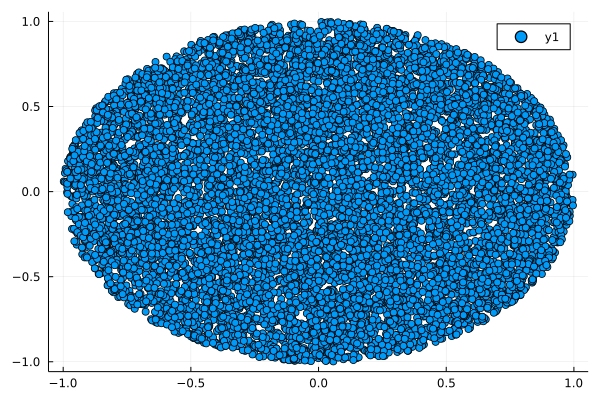

In [112]:
# for p = 2
x = zeros(10000)
y = zeros(10000)
for i in 1:10000
    x[i] = B[i,1]
    y[i] = B[i,2]
end
using Plots
Plots.scatter(x, y)

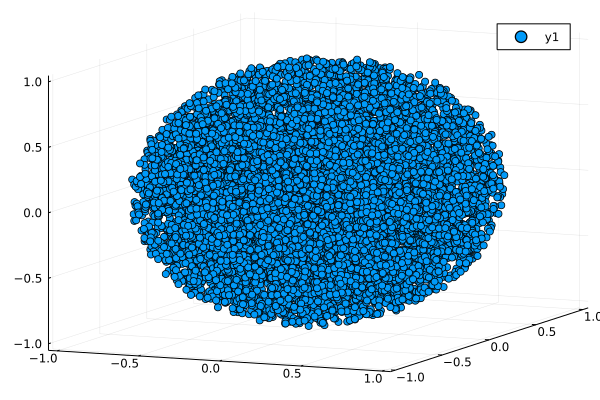

In [105]:
# for p = 3
x = zeros(10000)
y = zeros(10000)
z = zeros(10000)
for i in 1:10000
    x[i] = B[i,1]
    y[i] = B[i,2]
    z[i] = B[i,3]
end
using Plots
Plots.scatter(x, y, z)

In [113]:
## Question 3

In [114]:
dist = Normal(0, 1)

Normal{Float64}(μ=0.0, σ=1.0)

In [115]:
# for a = 1
a = 1

1

In [116]:
# for a = 4
a = 4

4

In [117]:
function F(x)
    if (x > -a) && (x < a)
        return (exp((-x^2)/2))/((cdf(dist, a) - cdf(dist, -a))*((2*π)^(1/2)))
    else 
        return 0
    end
end
        

F (generic function with 1 method)

In [118]:
G(x) = (exp((-x^2)/2))/((2*π)^(1/2))

G (generic function with 1 method)

In [119]:
C = zeros(100)
for i in 1:100
    Y = rand(dist)
    while true
        if (Y > -a) && (Y < a)
            C[i] = Y
            break
        else 
            Y = rand(dist)
        end
    end
end

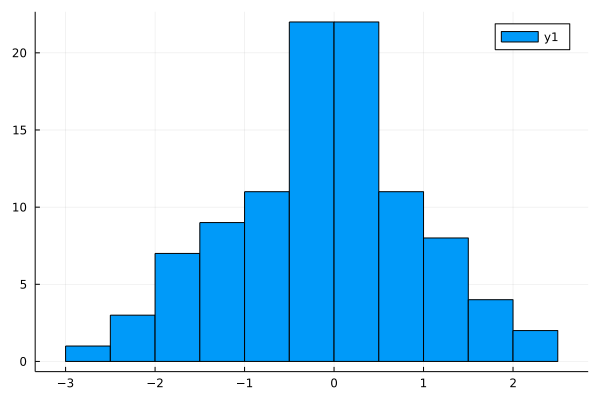

In [120]:
Plots.histogram(C)

In [121]:
mean(C)

-0.11723971426372501

In [122]:
var(C)

1.0614970237542742